Milestone 1
Venu Fitratama
Batch-16-RMT

I. Data Preparation

`This data is taken from :`

https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe

`directly take and load Sales.csv.`


`Dashboard from Google Data Studio :`

https://datastudio.google.com/reporting/543ae17b-f2d6-41af-a0ef-e104240c9fcb


II. Problem Identifications

`After the file is opened, there will be 113036 rows 18 columns with no null detected
Overall, the .csv file is about a dataset of bike, clothing and accessories sales.`

`My client wants to open 1 more franchise store, so he wants me to find out what kind of product category have most profit and which state of country have the most buyers so that he can make a new franchise store with highest profit.`

`According to this sales data, the records of sales is from 2011 - 2016, with detail of products info, customers info and price and profit per product.`

`Since we need to know which country have most buyers, how much profit the store make and what kind of products category have most sales, i will explore more about this data especially on country, state, sub category products and how much profit do they earn.`

`This data exploration will answer these questions :`

`What is the most product sales in every year?`

`Who is the most segmented gender that buy the product?`

`Where is the most product sold?`

`When is the company have most profit margin?`

`Why did the company should expand or not?`

`How is the increase or decrease of profit every year?`

III. Data Loading

In [99]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('Sales.csv')

#https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe

In [101]:
df.Order_Quantity.sum().sum()

1345316

In [102]:
#Shows the first 5 sample of dataset
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [103]:
#Shows the last 5 sample of dataset
df.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [104]:
#Shows the shape of dataset
df.shape

(113036, 18)

In [105]:
#Calculating missing values in dataset
df.isnull().sum().sum

#it shows there is no null or missing values in this dataset

<bound method NDFrame._add_numeric_operations.<locals>.sum of Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64>

In [106]:
#Shows central tendency of each score column
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


IV. Data Cleaning

In [107]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


`Info`

`Cost = unit cost * order quantity`
`Revenue != unit price * order quantity (this record must given discount to customer before sales and record the sales price after discount)`

`In order to make a neat notes, i need to change some columns here so that it will be easy to read later on.`

In [108]:
df = df.drop(['Profit', 'Revenue', 'Day'], axis=1)

#I Decide to Change Revenue with Price * Quantity
# and Profit with Margin

In [109]:
df['Price*Quantity'] = df['Unit_Price']*df['Order_Quantity']
df['Margin'] = df['Price*Quantity']-df['Cost']


In [110]:
df.head()

,Date,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Cost,Price*Quantity,Margin
0,2013-11-26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
1,2015-11-26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,960,600
2,2014-03-23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1035,2760,1725
3,2016-03-23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,900,2400,1500
4,2014-05-15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,480,300


In [111]:
#df.to_csv('Sales.csv', index=False)

V. Data Exploration

In [112]:
year = df.groupby(['Year'])['Year'].count().sort_values()
age = df.groupby(['Age_Group'])['Age_Group'].count().sort_values()
gender = df.groupby(['Customer_Gender'])['Customer_Gender'].count().sort_values()
country = df.groupby(['Country'])['Country'].count().sort_values()
state = df.groupby(['State'])['State'].count().sort_values()
cat = df.groupby(['Product_Category'])['Product_Category'].count().sort_values()
subcat = df.groupby(['Sub_Category'])['Sub_Category'].count().sort_values()
#I use this to count and to see distribution of data

In [113]:
year = df.groupby(['Year'])['Sub_Category'].agg(pd.Series.mode)
year
#this was used to see what is most sub category sales every year.

Year
2011         Road Bikes
2012         Road Bikes
2013    Tires and Tubes
2014    Tires and Tubes
2015    Tires and Tubes
2016    Tires and Tubes
Name: Sub_Category, dtype: object

`INSIGHT`

`2011 : there are 2677 transactions and the most selling product is Bikes (Road Bikes)`

`2012 : there are 2677 transactions and the most selling product is Bikes (Road Bikes)`

`2013 : there are 24443 transactions and the most selling product is Accessories (Tires and Tubes)`

`2014 : there are 24443 transactions and the most selling product is Accessories (Tires and Tubes)`

`2015 : there are 29398 transactions and the most selling product is Accessories (Tires and Tubes)`

`2016 : there are 29398 transactions and the most selling product is Accessories (Tires and Tubes)`

`2011 - 2016 : most buyers are Adults (35-64) from California, United States`

VI. Data Exploration, Analysis & Calculation

`In this section, i want to see the margin, order quantity per year and explore more about profit, product category/ sub category, and state per month`

`starting from 2011 to 2016`

In [114]:
if11 = df[df['Year'] == 2011]
if12 = df[df['Year'] == 2012]
if13 = df[df['Year'] == 2013]
if14 = df[df['Year'] == 2014]
if15 = df[df['Year'] == 2015]
if16 = df[df['Year'] == 2016]
#Filtering, only take year of 2011 - 2016

In [115]:
#Distribution of profit margin every year
margin11 = if11.Margin.sum().sum()
margin12 = if12.Margin.sum().sum()
margin13 = if13.Margin.sum().sum()
margin14 = if14.Margin.sum().sum()
margin15 = if15.Margin.sum().sum()
margin16 = if16.Margin.sum().sum()

print("Total Marginal Profit in 2011:", margin11, "USD")
print("Total Marginal Profit in 2012:", margin12, "USD")
print("Total Marginal Profit in 2013:", margin13, "USD")
print("Total Marginal Profit in 2014:", margin14, "USD")
print("Total Marginal Profit in 2015:", margin15, "USD")
print("Total Marginal Profit in 2016:", margin16, "USD")

Total Marginal Profit in 2011: 3981870 USD
Total Marginal Profit in 2012: 4065680 USD
Total Marginal Profit in 2013: 7747551 USD
Total Marginal Profit in 2014: 7417353 USD
Total Marginal Profit in 2015: 9909624 USD
Total Marginal Profit in 2016: 9004332 USD


In [116]:
#Distribution of order quantity every year
order11 = if11.Order_Quantity.sum().sum()
order12 = if12.Order_Quantity.sum().sum()
order13 = if13.Order_Quantity.sum().sum()
order14 = if14.Order_Quantity.sum().sum()
order15 = if15.Order_Quantity.sum().sum()
order16 = if16.Order_Quantity.sum().sum()

print("Total Order Quantity in 2011:", order11, "Products")
print("Total Order Quantity in 2012:", order12, "Products")
print("Total Order Quantity in 2013:", order13, "Products")
print("Total Order Quantity in 2014:", order14, "Products")
print("Total Order Quantity in 2015:", order15, "Products")
print("Total Order Quantity in 2016:", order16, "Products")

Total Order Quantity in 2011: 5260 Products
Total Order Quantity in 2012: 5354 Products
Total Order Quantity in 2013: 294787 Products
Total Order Quantity in 2014: 379585 Products
Total Order Quantity in 2015: 289517 Products
Total Order Quantity in 2016: 370813 Products


In [117]:
#Dataframe of profit margin and total order to make it easier to read and make a plot

data = [
['2011', margin11, order11],
['2012', margin12, order12],
['2013', margin13, order13],
['2014', margin14, order14],
['2015', margin15, order15],
['2016', margin16, order16]
]

data = pd.DataFrame(data, columns=['Year', 'Margins', 'Orders'])
data

,Year,Margins,Orders
0,2011,3981870,5260
1,2012,4065680,5354
2,2013,7747551,294787
3,2014,7417353,379585
4,2015,9909624,289517
5,2016,9004332,370813


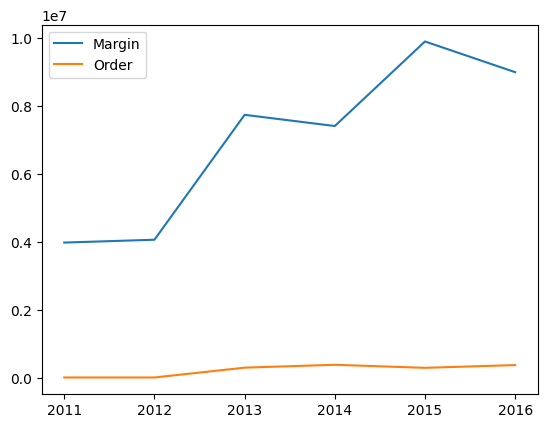

In [118]:
plotm = plt.plot(data["Year"], data["Margins"], label="Margin")
ploto = plt.plot(data["Year"], data["Orders"], label="Order")
plt.legend(loc="upper left")
plt.show()

`In 2011, there is not much of an increase of profit and order quantity,`

`there is significant increase from 2012 to 2013 in marginal profit and order quantity,`

`from 2013 to 2014, the total order quantity is significantly high while profit margin is decreased a little,`

`increase of profit margin happen between 2014 and 2015 while order quantity is decrease`

`same pattern happen in 2015 to 2015, just like what happened in 2013 to 2014 where profit margin is decrease and total order quantity is increase.`

--------------

`Let's break each year to see what kind of category & product category have most sales, which country and state have most buyers and what gender buy product the most for a year period.`

2011

In [119]:
#filtering to take only columns i need
if11_1 = if11[['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Margin']]

In [120]:
#Groupby by month and see .agg series mode for Country, State, Gender, Product Category and its Sub Category

if11_1 = if11.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)
if11_1

/var/folders/nl/t5l_f9n930l8vcs6qhlzghyr0000gn/T/ipykernel_7875/1151190345.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if11_1 = if11.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)


,Country,State,Customer_Gender,Product_Category,Sub_Category
Month,,,,,
April,United States,California,F,Bikes,Road Bikes
August,United States,California,F,Bikes,Road Bikes
December,Australia,California,F,Bikes,Road Bikes
February,Australia,British Columbia,M,Bikes,Road Bikes
January,Australia,California,F,Bikes,Road Bikes
July,United States,California,M,Bikes,Road Bikes
June,United States,California,M,Bikes,Road Bikes
March,United States,California,M,Bikes,Road Bikes
May,United States,California,F,Bikes,Road Bikes


`We cound see that Bikes are the most product category sold while the state that bought the most is from california (United States),`
`Buyers mostly are female that bough Road Bikes.`

In [121]:
#Total Margin Sales per Month
profit11 = if11.groupby(['Month'])['Margin'].agg(pd.Series.sum).sort_values()
#profit11

   Month  Margins
0    Jan   301712
1    Feb   269544
2    Mar   313300
3    Apr   309409
4    May   327269
5    Jun   286641
6    Jul   386422
7    Aug   391824
8    Sep   303111
9    Oct   319268
10   Nov   257491
11   Dec   515879



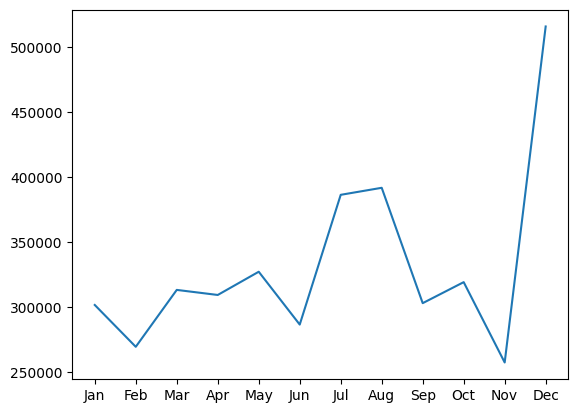

In [122]:
#re-load pandas dataframe for margin each month in 2011
profit11 = [
['Jan', 301712],
['Feb', 269544],
['Mar', 313300],
['Apr', 309409],
['May', 327269],
['Jun', 286641],
['Jul', 386422],
['Aug', 391824],
['Sep', 303111],
['Oct', 319268],
['Nov', 257491],
['Dec', 515879],
]

profit2011 = pd.DataFrame(profit11, columns=['Month', 'Margins'])
print(profit2011)
print('')
plotp11 = plt.plot(profit2011["Month"], profit2011["Margins"])
plt.show()

`The selling is ups and downs for 2011, while from june to july and november to december, there are significantly increasing margin of sales.`

`Total margin sales 3.981.870 with 5.260 total orders`

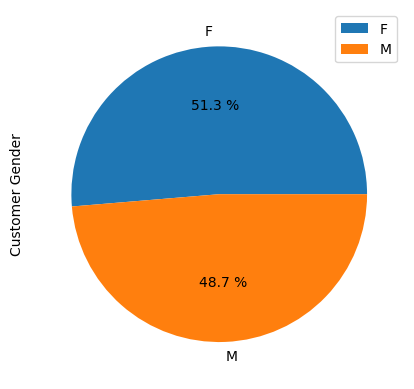

In [123]:
gender11 = if11.Customer_Gender.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Customer Gender', legend=True)

`Distribuion of male and female is almost equal where Male is 48.7% and female is 51.3%. Female distribution is greater by 2.6%`

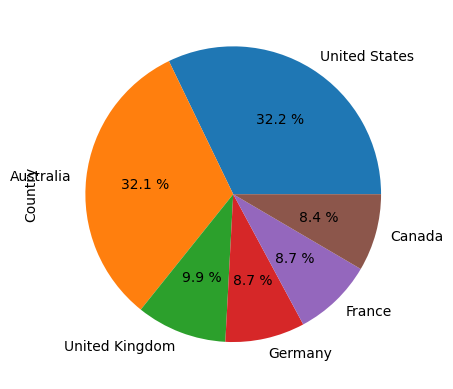

In [124]:
country11 = if11.Country.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Country', legend=False)


`Country with most sales is United States and Australia in 2011`

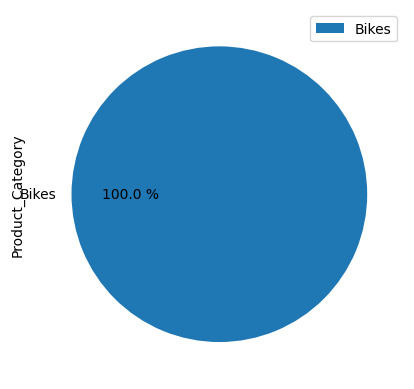

In [125]:
product11 = if11.Product_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Product_Category', legend=True)

`Product category : Bikes only`

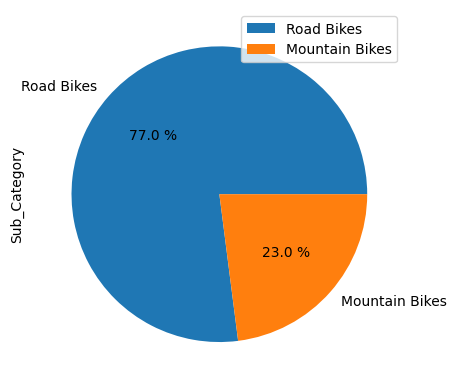

In [126]:
sub11 = if11.Sub_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Sub_Category', legend=True)

`Sub Category : Mountain Bikes & Road Bikes`

In [127]:
ct11 = if11[['Unit_Cost', 'Unit_Price', 'Cost', 'Price*Quantity', 'Margin']]
ct11.describe()

#These are the central tendency of each of cost and profit columns

,Unit_Cost,Unit_Price,Cost,Price*Quantity,Margin
count,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000
mean,1162.493463,1921.865895,2272.539036,3759.976466,1487.437430
std,618.573547,1031.468744,1914.046389,3184.273910,1286.911637
min,295.000000,540.000000,295.000000,540.000000,196.000000
25%,713.000000,1120.000000,1032.000000,1620.000000,592.000000
50%,1252.000000,2295.000000,1555.000000,2443.000000,1043.000000
75%,1555.000000,2443.000000,3110.000000,4886.000000,1854.000000
max,2171.000000,3578.000000,8684.000000,14312.000000,5952.000000


In [128]:
x = if11

m = if11.Margin.mean() 
s = if11.Margin.std() 
dof = len(if11.Margin)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
t_crit

1.9608508777884348

In [129]:
z1 = 1487.437430 - 1.9608508777884348
z2 = 1487.437430 + 1.9608508777884348

print('True mean for margin in 2011 with 95% confidence intervals is between',z1, "and",z2)

True mean for margin in 2011 with 95% confidence intervals is between 1485.4765791222114 and 1489.3982808777885


`we could see that the margin of company for every day is about 1487.437430 with convidence interval of 1.9608508777884348`

`We could say that this bikes store only doing sale for mountain bikes and road bikes with most customers are from United States and Australia, while the buyers are both equal male and female.`

`in a year, the sales of bikes is increasing from 301.712 USD to 515.879 USD. with total sales of 5.260 bikes and profit of 3.981.870 USD, with significant increase from june to july and november to december`

----

2012

In [130]:
#filtering to take only columns i need
if12_1 = if12[['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Margin']]

In [131]:
#Groupby by month and see .agg series mode for Country, State, Gender, Product Category and its Sub Category

if12_1 = if12.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)
if12_1

/var/folders/nl/t5l_f9n930l8vcs6qhlzghyr0000gn/T/ipykernel_7875/2922512216.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if12_1 = if12.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)


,Country,State,Customer_Gender,Product_Category,Sub_Category
Month,,,,,
April,United States,California,F,Bikes,Road Bikes
August,United States,California,F,Bikes,Road Bikes
December,Australia,California,F,Bikes,Road Bikes
February,Australia,British Columbia,M,Bikes,Road Bikes
January,Australia,California,F,Bikes,Road Bikes
July,United States,California,M,Bikes,Road Bikes
June,United States,California,M,Bikes,Road Bikes
March,United States,California,M,Bikes,Road Bikes
May,United States,California,F,Bikes,Road Bikes


`We cound see that Road Bikes are the most favourite product in 12 month category sold while the state that bought the most is from California, United States, mostly females.`

In [132]:
#Total Margin Sales per Month
profit12 = if12.groupby(['Month'])['Margin'].agg(pd.Series.sum).sort_values()
#profit12

   Month  Margins
0    Jan   298190
1    Feb   272098
2    Mar   326730
3    Apr   322266
4    May   339392
5    Jun   301374
6    Jul   378918
7    Aug   410778
8    Sep   308694
9    Oct   331230
10   Nov   269812
11   Dec   506198



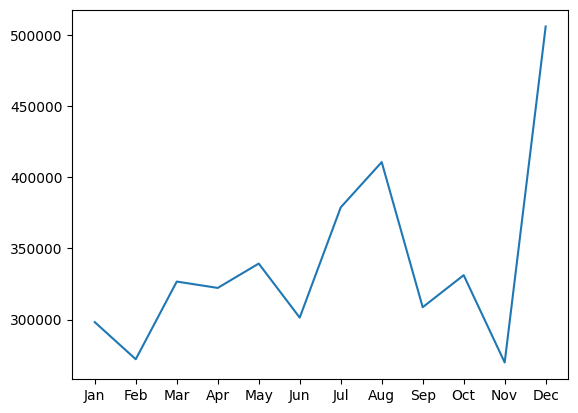

In [133]:
#re-load pandas dataframe for margin each month in 2011
profit2012 = [
['Jan', 298190],
['Feb', 272098],
['Mar', 326730],
['Apr', 322266],
['May', 339392],
['Jun', 301374],
['Jul', 378918],
['Aug', 410778],
['Sep', 308694],
['Oct', 331230],
['Nov', 269812],
['Dec', 506198]]

profit2012 = pd.DataFrame(profit2012, columns=['Month', 'Margins'])
print(profit2012)
print('')
plotp11 = plt.plot(profit2012["Month"], profit2012["Margins"])
plt.show()



`The selling is ups and downs for 2012, while from june to july and november to december, there are significantly increasing margin of sales, the trend of increase happen just like in 2011`

`Total margin sales 4.065.680 with 5.354 total orders`

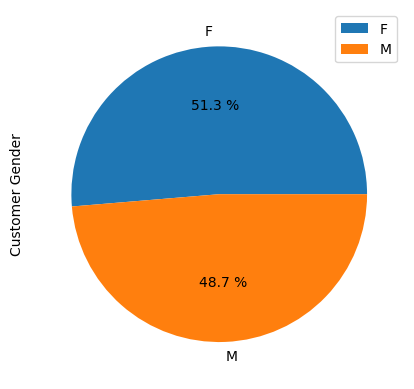

In [134]:
gender12 = if12.Customer_Gender.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Customer Gender', legend=True)

`Distribuion of male and female is almost equal where Male is 48.7% and female is 51.3%, there is no difference in 2011 to 2012, while the difference is only 2.6%`

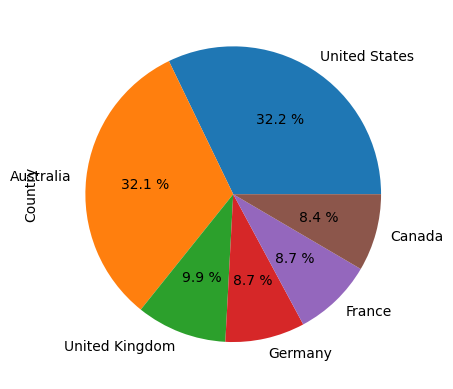

In [135]:
country12 = if12.Country.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Country', legend=False)


`Country with most sales is United States and Australia.`

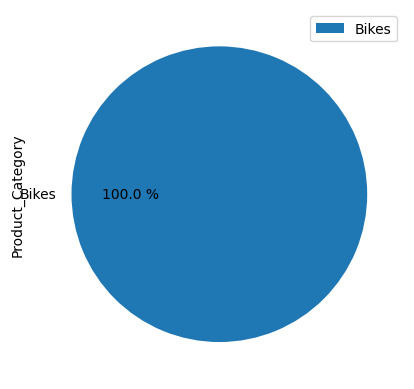

In [136]:
product12 = if12.Product_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Product_Category', legend=True)

`Product category : Bikes only`

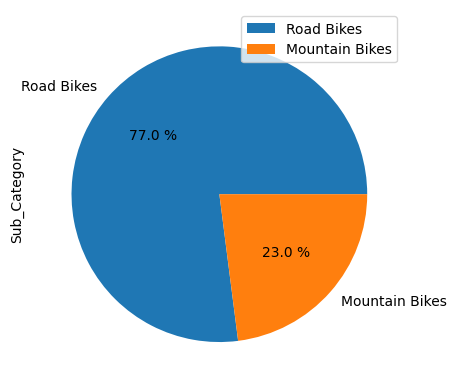

In [137]:
sub12 = if12.Sub_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Sub_Category', legend=True)

`Sub Category : Mountain Bikes & Road Bikes`

In [138]:
print("Profit difference between 2012 and 2011:", 4065680 - 3981870, "USD")
print("and")
print("Total order quantity difference between 2012 and 2011:", 5354 - 5260 ,"Orders")

Profit difference between 2012 and 2011: 83810 USD
and
Total order quantity difference between 2012 and 2011: 94 Orders


In [139]:
ct12 = if12[['Unit_Cost', 'Unit_Price', 'Cost', 'Price*Quantity', 'Margin']]
ct12.describe()

#These are the central tendency of each of cost and profit columns

,Unit_Cost,Unit_Price,Cost,Price*Quantity,Margin
count,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000
mean,1162.493463,1921.865895,2324.986926,3843.731789,1518.744864
std,618.573547,1031.468744,1237.147094,2062.937488,845.105728
min,295.000000,540.000000,590.000000,1080.000000,392.000000
25%,713.000000,1120.000000,1426.000000,2240.000000,814.000000
50%,1252.000000,2295.000000,2504.000000,4590.000000,1776.000000
75%,1555.000000,2443.000000,3110.000000,4886.000000,2108.000000
max,2171.000000,3578.000000,4342.000000,7156.000000,2976.000000


In [140]:
x = if12

m = if12.Margin.mean() 
s = if12.Margin.std() 
dof = len(if12.Margin)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
t_crit

1.9608508777884348

In [141]:
z1 = 1518.744864 - 1.9608508777884348
z2 = 1518.744864 + 1.9608508777884348

print('True mean for margin in 2012 with 95% confidence intervals is between',z1, "and",z2)

True mean for margin in 2012 with 95% confidence intervals is between 1516.7840131222115 and 1520.7057148777885


`Overall, 2012 and 2011 have quite the same result`

----

2013

In [142]:
#filtering to take only columns i need
if13_1 = if11[['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Margin']]

In [143]:
#Groupby by month and see .agg series mode for Country, State, Gender, Product Category and its Sub Category

if13_1 = if13.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)
if13_1

/var/folders/nl/t5l_f9n930l8vcs6qhlzghyr0000gn/T/ipykernel_7875/3442368530.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if13_1 = if13.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)


,Country,State,Customer_Gender,Product_Category,Sub_Category
Month,,,,,
April,Australia,New South Wales,M,Bikes,Road Bikes
August,United States,California,F,Accessories,Tires and Tubes
December,United States,California,M,Accessories,Tires and Tubes
February,Australia,New South Wales,F,Bikes,Road Bikes
January,Australia,New South Wales,M,Bikes,Road Bikes
July,United States,California,F,Accessories,Bottles and Cages
June,Australia,California,F,Bikes,Road Bikes
March,Australia,New South Wales,M,Bikes,Road Bikes
May,Australia,California,M,Bikes,Road Bikes


`It seems that the company did add new product.`
`California, United States still the most state that buy the product, with Bikes and Accessories both equal in product category.`
`Seems like male is the most customer gender in 2013`

In [144]:
#Total Margin Sales per Month
profit13 = if13.groupby(['Month'])['Margin'].agg(pd.Series.sum).sort_values()
#profit13

   Month  Margins
0    Jan   198985
1    Feb   225102
2    Mar   214523
3    Apr   223544
4    May   273663
5    Jun   248987
6    Jul   597098
7    Aug   941389
8    Sep  1050323
9    Oct  1072852
10   Nov  1161452
11   Dec  1539633



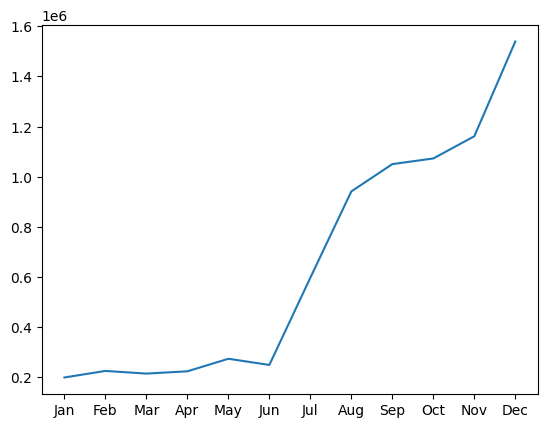

In [145]:
#re-load pandas dataframe for margin each month in 2011
profit2013 = [
['Jan', 198985],
['Feb', 225102],
['Mar', 214523],
['Apr', 223544],
['May', 273663],
['Jun', 248987],
['Jul', 597098],
['Aug', 941389],
['Sep', 1050323],
['Oct', 1072852],
['Nov', 1161452],
['Dec', 1539633]]

profit2013 = pd.DataFrame(profit2013, columns=['Month', 'Margins'])
print(profit2013)
print('')
plotp13 = plt.plot(profit2013["Month"], profit2013["Margins"])
plt.show()



`in 2011 and 2012, from august to december, usually there is a decrease of sales, but in 2013, from june to december, the increase of sales is significantly high`

`Total Marginal Profit in 2013: 7747551 USD, Total Order Quantity in 2013: 294787 Products`

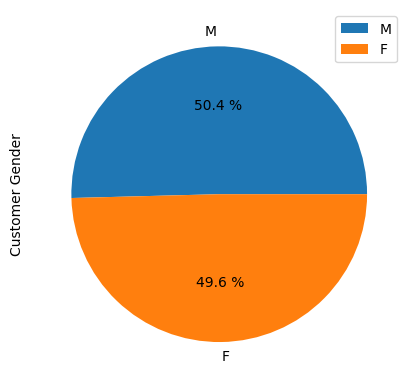

In [146]:
gender13 = if13.Customer_Gender.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Customer Gender', legend=True)

`while 2011 and 2012 have most female as buyers, there is 0.8% difference in 2013 where male is the most buyers`

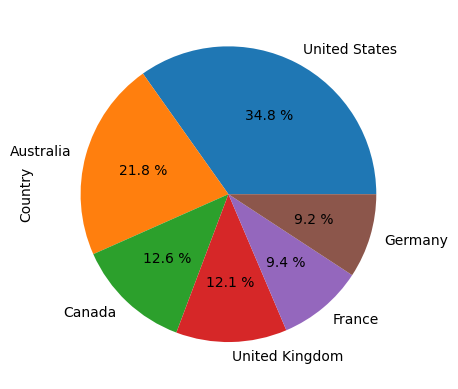

In [147]:
country13 = if13.Country.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Country', legend=False)

`there is increase of sales in Germany, France, UK and Canada, and decrease sales in australia.`

`United states still is the most country with most sales.`

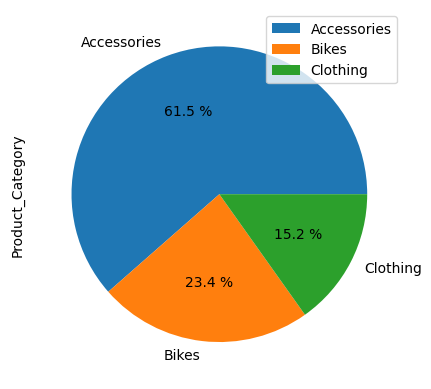

In [148]:
product13 = if13.Product_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Product_Category', legend=True)

`In 2011 and 2012, the company only sell bikes, but in 2013, the company add their product to Accessories and Clothing.`

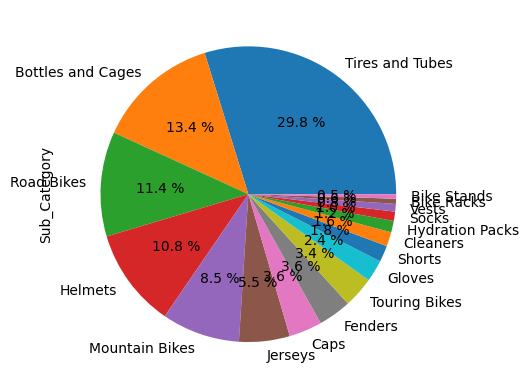

In [149]:
sub13 = if13.Sub_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Sub_Category', legend=False)

In [150]:
ct13 = if13[['Unit_Cost', 'Unit_Price', 'Cost', 'Price*Quantity', 'Margin']]
ct13.describe()

#These are the central tendency of each of cost and profit columns

,Unit_Cost,Unit_Price,Cost,Price*Quantity,Margin
count,24443.000000,24443.000000,24443.000000,24443.000000,24443.000000
mean,276.139426,469.568875,379.692714,696.656712,316.963998
std,560.446081,943.063053,598.540219,989.826136,409.109532
min,1.000000,2.000000,1.000000,2.000000,1.000000
25%,2.000000,5.000000,29.000000,75.000000,42.000000
50%,9.000000,25.000000,120.000000,270.000000,154.000000
75%,42.000000,70.000000,420.000000,875.000000,418.000000
max,2171.000000,3578.000000,40014.000000,64368.000000,24354.000000


In [151]:
x = if13

m = if13.Margin.mean() 
s = if13.Margin.std() 
dof = len(if13.Margin)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
t_crit

1.9600610464299144

In [152]:
z1 = 316.963998 - 1.9600610464299144
z2 = 316.963998 + 1.9600610464299144

print('True mean for margin in 2013 with 95% confidence intervals is between',z1, "and",z2)

True mean for margin in 2013 with 95% confidence intervals is between 315.0039369535701 and 318.92405904642993


`These are the kind of products that the company sells after they add new category product, the new accessories especially Tires and Tubes are having most sales in 2013`

`2 Years with stagnant total of sales, after the company add new product category, the sales is significantly increase from june to december with product category of bikes, clothing and accessories.`
`Road bikes still the most category that sold in this company with Tires and Tubes as the accessories following Road Bikes as bike sales.`

---

2014

In [153]:
#filtering to take only columns i need
if14_1 = if14[['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Margin']]

In [154]:
#Groupby by month and see .agg series mode for Country, State, Gender, Product Category and its Sub Category

if14_1 = if14.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)
if14_1

/var/folders/nl/t5l_f9n930l8vcs6qhlzghyr0000gn/T/ipykernel_7875/1504428933.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if14_1 = if14.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)


,Country,State,Customer_Gender,Product_Category,Sub_Category
Month,,,,,
April,United States,California,M,Accessories,Tires and Tubes
February,United States,California,M,Accessories,Tires and Tubes
January,United States,California,M,Accessories,Tires and Tubes
July,United States,British Columbia,M,Accessories,Tires and Tubes
June,United States,California,M,Accessories,Tires and Tubes
March,United States,California,M,Accessories,Tires and Tubes
May,United States,California,M,Accessories,Tires and Tubes


`it seems they only take record in 7 months, namely ; Jan, Feb, Mar, Apr, May, Jun, and Jul.`
`Most state that buy the product is still california with male buyers while the category is not bikes anymore but tires and tubes from accessories category.`

In [155]:
#Total Margin Sales per Month
profit14 = if14.groupby(['Month'])['Margin'].agg(pd.Series.sum).sort_values()
#profit14

`i take out july from the graph because the gap is too high between 1.432.170 and 317.423`

  Month  Margins
0   Jan  1047566
1   Feb  1016970
2   Mar  1105618
3   Apr  1151335
4   May  1346271
5   Jun  1432170



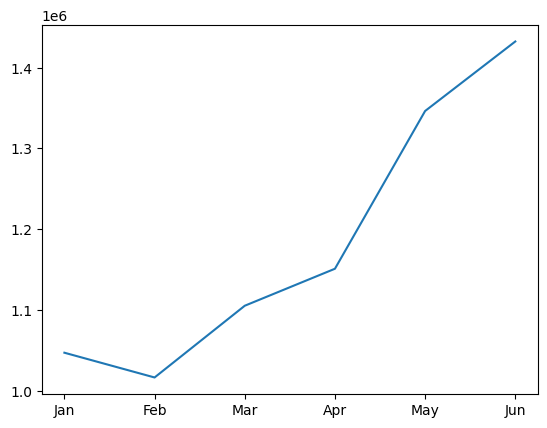

In [156]:
#re-load pandas dataframe for margin each month in 2011
profit14 = [
['Jan', 1047566],
['Feb', 1016970],
['Mar', 1105618],
['Apr', 1151335],
['May', 1346271],
['Jun', 1432170]]

profit2014 = pd.DataFrame(profit14, columns=['Month', 'Margins'])
print(profit2014)
print('')
plotp14 = plt.plot(profit2014["Month"], profit2014["Margins"])
plt.show()

`while usually from Q1 and Q2 each year, the sales in not significantly high, it also happen in 2014 while the difference is only about 300.000 from january to june`

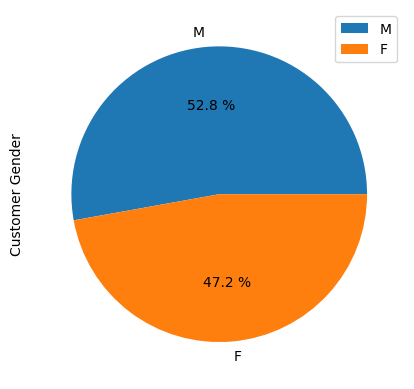

In [157]:
gender14 = if14.Customer_Gender.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Customer Gender', legend=True)

`Distribution of male is 5,6% higher than female. where there are 52.8% male and 47.2% female`

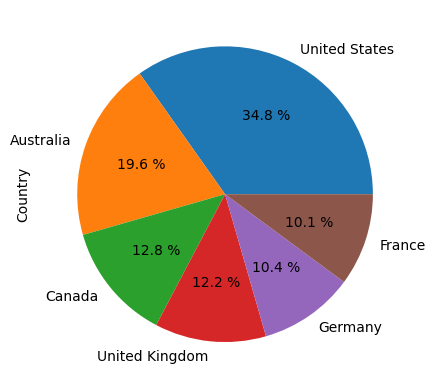

In [158]:
country14 = if14.Country.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Country', legend=False)

`There is small increase of sales in Germany, France, UK and Canada`
`Sales in Australia keeps decreasing.`

`United states still is the most country with most sales.`

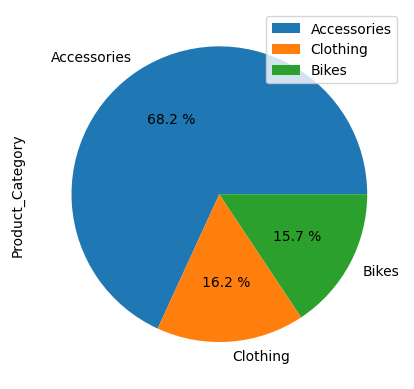

In [159]:
product14 = if14.Product_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Product_Category', legend=True)

`The sales of accessories increasing from 61.5% in 2013 to 68.2% in 2014`
`while bike is decreasing from 23.4% to 15.7% and clothing is stagnan still in 16%`

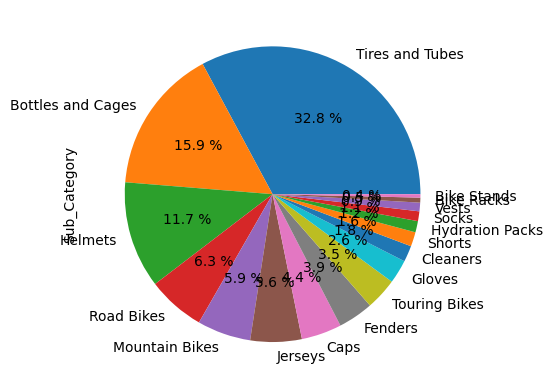

In [160]:
sub14 = if14.Sub_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Sub_Category', legend=False)

In [161]:
ct14 = if14[['Unit_Cost', 'Unit_Price', 'Cost', 'Price*Quantity', 'Margin']]
ct14.describe()

#These are the central tendency of each of cost and profit columns

,Unit_Cost,Unit_Price,Cost,Price*Quantity,Margin
count,29398.000000,29398.000000,29398.000000,29398.000000,29398.000000
mean,178.426594,305.349582,281.945609,534.253691,252.308082
std,451.994660,761.429255,449.325079,753.629841,324.818000
min,1.000000,2.000000,1.000000,2.000000,1.000000
25%,2.000000,5.000000,26.000000,63.000000,33.000000
50%,8.000000,22.000000,78.000000,180.000000,96.000000
75%,21.000000,50.000000,308.000000,700.000000,349.000000
max,2171.000000,3578.000000,2171.000000,3600.000000,2250.000000


In [162]:
x = if14

m = if14.Margin.mean() 
s = if14.Margin.std() 
dof = len(if14.Margin)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
t_crit

1.9600446855383329

In [163]:
z1 = 252.308082 - 1.9600446855383329
z2 = 252.308082 + 1.9600446855383329

print('True mean for margin in 2014 with 95% confidence intervals is between',z1, "and",z2)

True mean for margin in 2014 with 95% confidence intervals is between 250.3480373144617 and 254.26812668553833


`increase in accessories make tires and tubes sales increase more significant`

`Total marginal profit in 2014 is 7.417.353 USD which is about 330.198 USD lower than the previous year.`
`The marginal profit decrease because they only record it until july.`

`if only the company did the full record, by the data i am guessing marginal profit by the end of the year is about 8.000.000 USD to 9.000.000 USD`

---

2015 :

In [164]:
#filtering to take only columns i need
if15_1 = if15[['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Margin']]

In [165]:
#Groupby by month and see .agg series mode for Country, State, Gender, Product Category and its Sub Category

if15_1 = if15.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)
if15_1

/var/folders/nl/t5l_f9n930l8vcs6qhlzghyr0000gn/T/ipykernel_7875/3511507215.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if15_1 = if15.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)


,Country,State,Customer_Gender,Product_Category,Sub_Category
Month,,,,,
April,Australia,New South Wales,M,Bikes,Road Bikes
August,United States,California,F,Accessories,Tires and Tubes
December,United States,California,M,Accessories,Tires and Tubes
February,Australia,New South Wales,F,Bikes,Road Bikes
January,Australia,New South Wales,M,Bikes,Road Bikes
July,United States,California,F,Accessories,Bottles and Cages
June,Australia,California,F,Bikes,Road Bikes
March,Australia,New South Wales,M,Bikes,Road Bikes
May,Australia,California,M,Bikes,Road Bikes


`The pattern seems back to 2014 where tires and tubes from accessories is the most sales with road bikes from bikes is also the most sales to california, united states with male as the most buyer.`

In [166]:
#Total Margin Sales per Month
profit15 = if15.groupby(['Month'])['Margin'].agg(pd.Series.sum).sort_values()
#profit15

   Month  Margins
0    Jan   306029
1    Feb   313489
2    Mar   328469
3    Apr   342465
4    May   414928
5    Jun   365422
6    Jul   823880
7    Aug  1107369
8    Sep  1263528
9    Oct  1292277
10   Nov  1432617
11   Dec  1919151



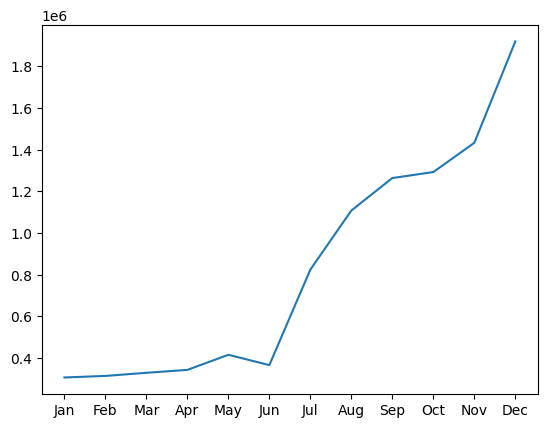

In [167]:
#re-load pandas dataframe for margin each month in 2011
profit15 = [
['Jan', 306029],
['Feb', 313489],
['Mar', 328469],
['Apr', 342465],
['May', 414928],
['Jun', 365422],
['Jul', 823880],
['Aug', 1107369],
['Sep', 1263528],
['Oct', 1292277],
['Nov', 1432617],
['Dec', 1919151],
]

profit2015 = pd.DataFrame(profit15, columns=['Month', 'Margins'])
print(profit2015)
print('')
plotp15 = plt.plot(profit2015["Month"], profit2015["Margins"])
plt.show()

`here, the trend of increase is also the same from june to december, there is significant increase of sales.`

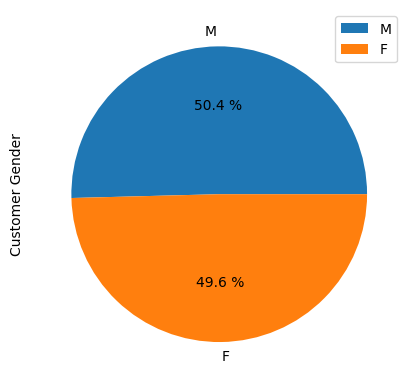

In [168]:
gender15 = if15.Customer_Gender.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Customer Gender', legend=True)

`the distribution of male and female is almost equally the same, they only have 0.8% difference where male is 50.4% and female is 49.6%.`

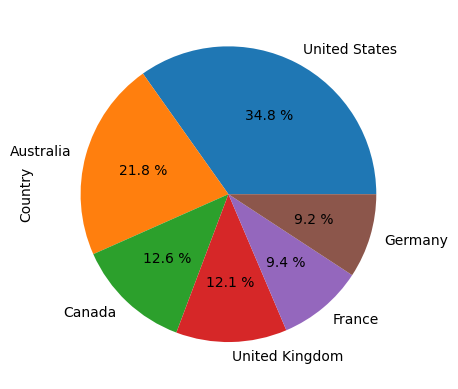

In [169]:
country15 = if15.Country.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Country', legend=False)

`United states still have the most sales`

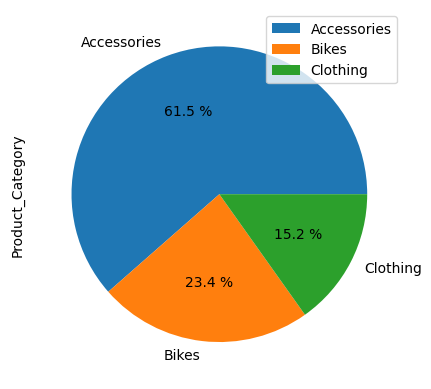

In [170]:
product15 = if15.Product_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Product_Category', legend=True)

`Accessories still have the most sales and increase in sales of bikes.`

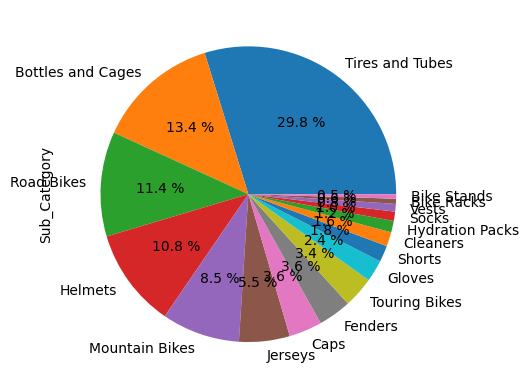

In [171]:
sub15 = if15.Sub_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Sub_Category', legend=False)

In [172]:
ct15 = if15[['Unit_Cost', 'Unit_Price', 'Cost', 'Price*Quantity', 'Margin']]
ct15.describe()

#These are the central tendency of each of cost and profit columns

,Unit_Cost,Unit_Price,Cost,Price*Quantity,Margin
count,24443.000000,24443.000000,24443.000000,24443.000000,24443.000000
mean,276.139426,469.568875,511.206808,916.624473,405.417666
std,560.446081,943.063053,981.682463,1634.845214,666.644248
min,1.000000,2.000000,1.000000,2.000000,1.000000
25%,2.000000,5.000000,28.000000,70.000000,39.000000
50%,9.000000,25.000000,117.000000,261.000000,144.000000
75%,42.000000,70.000000,468.000000,945.000000,460.000000
max,2171.000000,3578.000000,42978.000000,69136.000000,26158.000000


In [173]:
x = if15

m = if15.Margin.mean() 
s = if15.Margin.std() 
dof = len(if15.Margin)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
t_crit

1.9600610464299144

In [174]:
z1 = 405.417666 - 1.9600610464299144
z2 = 405.417666 + 1.9600610464299144

print('True mean for margin in 2015 with 95% confidence intervals is between',z1, "and",z2)

True mean for margin in 2015 with 95% confidence intervals is between 403.45760495357007 and 407.3777270464299


`sales of road bikes seems increase, and tires and tubes still the most sales of product.`

`Total Marginal Profit in 2015 is 9.909.624 USD with Total Order Quantity 289.517 Products.`
`In the last 5 years, the sales of the company keeps increasing by total marginal profit each year.`

---

2016 :

In [175]:
#filtering to take only columns i need
if16_1 = if16[['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Order_Quantity', 'Margin']]

In [176]:
#Groupby by month and see .agg series mode for Country, State, Gender, Product Category and its Sub Category
if16_1 = if16.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)
if16_1

/var/folders/nl/t5l_f9n930l8vcs6qhlzghyr0000gn/T/ipykernel_7875/1558168467.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if16_1 = if16.groupby(['Month'])['Country', 'State', 'Customer_Gender', 'Product_Category', 'Sub_Category'].agg(pd.Series.mode)


,Country,State,Customer_Gender,Product_Category,Sub_Category
Month,,,,,
April,United States,California,M,Accessories,Tires and Tubes
February,United States,California,M,Accessories,Tires and Tubes
January,United States,California,M,Accessories,Tires and Tubes
July,United States,British Columbia,M,Accessories,Tires and Tubes
June,United States,California,M,Accessories,Tires and Tubes
March,United States,California,M,Accessories,Tires and Tubes
May,United States,California,M,Accessories,Tires and Tubes


`The record is only from january to june with tires and tubes as the most sub category product sold in california, united states with male as the most buyer.`

In [177]:
#Total Margin Sales per Month
profit16 = if16.groupby(['Month'])['Margin'].agg(pd.Series.sum).sort_values()
#profit16

  Month  Margins
0   Jan  1292482
1   Feb  1239270
2   Mar  1327852
3   Apr  1398113
4   May  1648502
5   Jun  1791518



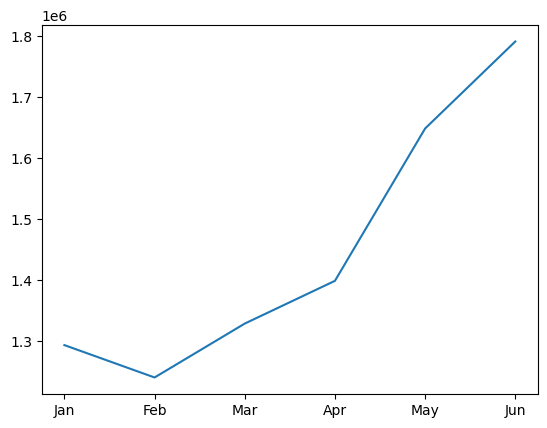

In [178]:
#re-load pandas dataframe for margin each month in 2011
profit16 = [
['Jan', 1292482],
['Feb', 1239270],
['Mar', 1327852],
['Apr', 1398113],
['May', 1648502],
['Jun', 1791518],
]

profit2016 = pd.DataFrame(profit16, columns=['Month', 'Margins'])
print(profit2016)
print('')
plotp16 = plt.plot(profit2016["Month"], profit2016["Margins"])
plt.show()

`i take out july from the graph because the gap is too high between 1.791.518 and 306.595, the pattern same like 2014 where it is increasing from february to june even though its not significant.`

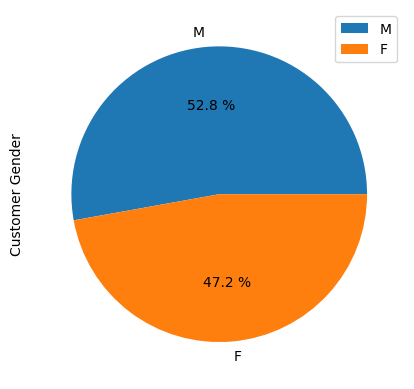

In [179]:
gender16 = if16.Customer_Gender.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Customer Gender', legend=True)

`male distribution higher in number than 2014, where there are 52.8% male and 47.2% female.`

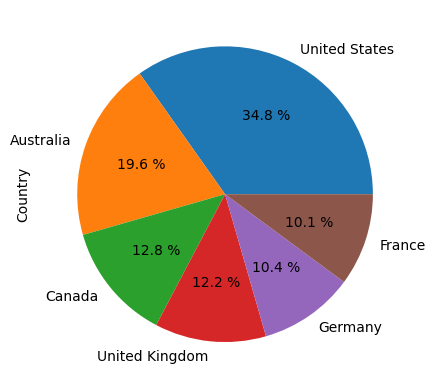

In [180]:
country16 = if16.Country.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Country', legend=False)

`United states still is the most country to where the product is sols and there are increase in france, germany, UK and canada while australia keeps decreasing.`

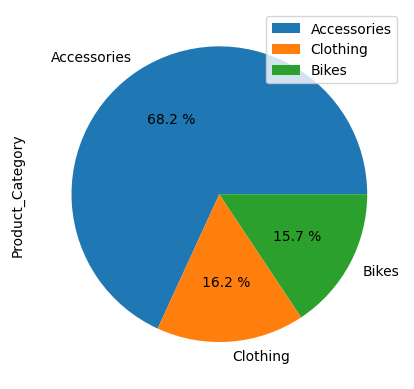

In [181]:
product16 = if16.Product_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Product_Category', legend=True)

`Accessories product keeps higher in sales distribution than clothing and bikes.`

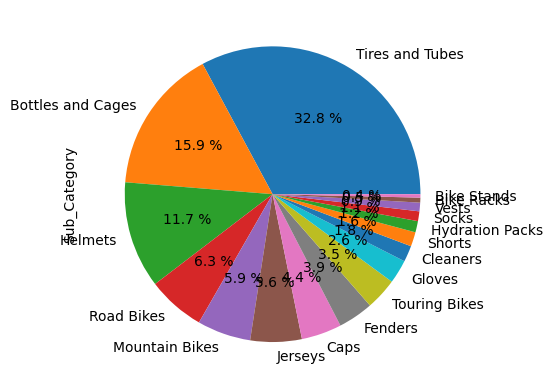

In [182]:
sub16 = if16.Sub_Category.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='Sub_Category', legend=False)

In [183]:
ct16 = if16[['Unit_Cost', 'Unit_Price', 'Cost', 'Price*Quantity', 'Margin']]
ct16.describe()

#These are the central tendency of each of cost and profit columns

,Unit_Cost,Unit_Price,Cost,Price*Quantity,Margin
count,29398.000000,29398.000000,29398.000000,29398.000000,29398.000000
mean,178.426594,305.349582,363.202837,669.493469,306.290632
std,451.994660,761.429255,756.737734,1268.189218,525.880808
min,1.000000,2.000000,1.000000,2.000000,1.000000
25%,2.000000,5.000000,24.000000,60.000000,30.000000
50%,8.000000,22.000000,75.000000,175.000000,90.000000
75%,21.000000,50.000000,299.000000,700.000000,352.000000
max,2171.000000,3578.000000,6513.000000,10734.000000,4464.000000


In [184]:
x = if16

m = if16.Margin.mean() 
s = if16.Margin.std() 
dof = len(if16.Margin)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
t_crit

1.9600446855383329

In [185]:
z1 = 306.290632 - 1.9600446855383329
z2 = 306.290632 + 1.9600446855383329

print('True mean for margin in 2016 with 95% confidence intervals is between',z1, "and",z2)

True mean for margin in 2016 with 95% confidence intervals is between 304.3305873144617 and 308.25067668553834


`just like 2014, the sales of road bikes and mountain bikes are less than helmets while tires & tubes and bottles & cages is having the most sales by sub category product.`

`by 7 months record, the marginal profit is 9.004.332 USD, about 900.000 USD lower than the last year.`

---

VII. Conclusion & Company Action Step

`i could say from the record of bike sales that the company should expand more to United States, especially in California.`

`from the last 6 years, from 2011 and 2016, there are not much change that California is the state with most buyers.`
`before the company add new category of clothing and accessories, the most buyers are female, but after they add new category, most men buy the product especially accessories namely Tires & Tubes and Bottles & Cages.`
`beside, the marginal profit keeps increase year by year, means the customer is not only loyal, but there are also many new customers that keeps buying the product.`

`in order to maximaze the profit, the company should improve or even innovate more Tires & Tubes, Bottles & Cages and also helments in accessories type.`